In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties
import numpy as np
import os

from cj_fonts import fifty_fonts
from utils.init_model import preprocess, load_model
from utils.initialize_font_data import fox_text_four_lines, retrieve_font_path, exclusive_attributes, inclusive_attributes, all_attributes, train_font_names, validation_font_names, test_font_names, font_names, gray_scale_image_file_dir
from utils.dataset import MyDataset, TestDataset
from utils.evaluate_tools import evaluate_used_dumped_image_use_score, evaluate_use_dumped_image, calculate_corr
from utils.lora_multiheadattention import LoRAConfig

loading JIT archive /home/yuki/.cache/clip/ViT-B-32.pt
exclusive_attributes:  ['capitals', 'monospace']


In [2]:
font_dir = '../gwfonts'
cj_font_dir = '../all-fonts'
font_paths = [os.path.join(font_dir, f) for f in os.listdir(font_dir)]
fifty_font_paths = [os.path.join(cj_font_dir, f) for f in fifty_fonts.split('\n') if f != '']

# add font
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

for font in font_manager.findSystemFonts(cj_font_dir):
    font_manager.fontManager.addfont(font)

font_paths = [retrieve_font_path(font_name, font_dir=font_dir) for font_name in font_names]
validation_font_paths = [retrieve_font_path(font_name, font_dir=font_dir) for font_name in validation_font_names]
test_font_paths = [retrieve_font_path(font_name, font_dir=font_dir) for font_name in test_font_names]


In [3]:
selected_15_cjk_font_paths = [
  '../all-fonts/chogokubosogothic_5.ttf',
  '../all-fonts/Kazesawa-ExtraLight.ttf',
  '../all-fonts/ゆず ポップ A [M] Light.ttf',
  '../all-fonts/SentyCaramel.ttf',
  '../all-fonts/ちはや純.ttf',
  '../all-fonts/irohamaru-mikami-Light.ttf',
  '../all-fonts/SanariFontB001.ttf',
  '../all-fonts/Tanugo-TTF-Round-Bold.ttf',
  '../all-fonts/Tanugo-TTF-Regular.ttf',
  '../all-fonts/Senobi-Gothic-Bold.ttf',
  '../all-fonts/851CHIKARA-DZUYOKU_kanaA_004.ttf',
  '../all-fonts/mgentle-hks.ttf',
  '../all-fonts/NasuM-Bold-20200227.ttf',
  '../all-fonts/FZ-black.TTF',
  '../all-fonts/M+A1_heavy-10-1.2.otf',
]

In [4]:
selected_15_roman_font_paths = [
  '../gwfonts/Sedan-Italic.ttf',
  '../gwfonts/Sevillana-Regular.ttf',
  '../gwfonts/GreatVibes-Regular.ttf',
  '../gwfonts/LifeSavers-Bold.ttf',
  '../gwfonts/Astloch-Bold.ttf',
  '../gwfonts/GFSNeohellenic-Italic.ttf',
  '../gwfonts/PlayfairDisplaySC-BoldItalic.ttf',
  '../gwfonts/YanoneTagesschrift.ttf',
  '../gwfonts/UbuntuMono-Bold.ttf',
  '../gwfonts/Puritan-Bold.ttf',
  '../gwfonts/Nobile-Medium.ttf',
  '../gwfonts/Dosis-Light.ttf',
  '../gwfonts/Roboto-Light.ttf',
  '../gwfonts/Arimo-Bold.ttf',
  '../gwfonts/CabinCondensed-Medium.ttf',
]

In [5]:
# load clip_model
clip_model = load_model()

loading JIT archive /home/yuki/.cache/clip/ViT-B-32.pt


In [57]:
checkpoint_path = "model_checkpoints/cv_5_0_ViT-B_32_bce_lora_t-qkvo_256-1024.0_91011_batch64_aug50_cj400_lbound_of_scale0.35_max_attr_num_3_random_p_num_10000_geta0.2_use_negative_lr2e-05-0.1_image_file_dir.pt"
checkpoint_path = "model_checkpoints/cv_5_1_ViT-B_32_bce_lora_t-qkvo_256-1024.0_91011_batch64_aug50_cj400_lbound_of_scale0.35_max_attr_num_3_random_p_num_10000_geta0.2_use_negative_lr2e-05-0.1_image_file_dir.pt"
checkpoint_path = "model_checkpoints/cv_5_2_ViT-B_32_bce_lora_t-qkvo_256-1024.0_91011_batch64_aug50_cj400_lbound_of_scale0.35_max_attr_num_3_random_p_num_10000_geta0.2_use_negative_lr2e-05-0.1_image_file_dir.pt"
checkpoint_path = "model_checkpoints/cv_20_5_ViT-B_32_bce_lora_t-qkvo_256-1024.0_91011_batch64_aug50_cj400_lbound_of_scale0.35_max_attr_num_3_random_p_num_10000_geta0.2_use_negative_lr2e-05-0.1_image_file_dir.pt"
# use lora model
lora_config_text = LoRAConfig(
    r=256,
    alpha=1024.0,
    bias=False,
    learnable_alpha=False,
    apply_q=True,
    apply_k=True,
    apply_v=True,
    apply_out=True,
)
fclip_model = load_model(
    checkpoint_path,
    model_name="ViT-B/32",
    use_oft_vision=False,
    use_oft_text=False,
    oft_config_vision=None,
    oft_config_text=None,
    use_lora_vision=False,
    use_lora_text=True,
    lora_config_vision=None,
    lora_config_text=lora_config_text,
    use_coop_vision=False,
    use_coop_text=False,
    precontext_length_vision=None,
    precontext_length_text=None,
    precontext_dropout_rate=0.0,
    pt_applied_layers=None,
)
fclip_model.eval()
pass

loading JIT archive /home/yuki/.cache/clip/ViT-B-32.pt
init_model: loading checkpoint model_checkpoints/cv_20_5_ViT-B_32_bce_lora_t-qkvo_256-1024.0_91011_batch64_aug50_cj400_lbound_of_scale0.35_max_attr_num_3_random_p_num_10000_geta0.2_use_negative_lr2e-05-0.1_image_file_dir.pt


# Deprecated

In [51]:
font_dir = '../gwfonts'
text = fox_text_four_lines
# text = '夏林\n火山'
texts_for_font_image = [text]
char_size = 150
line_num = text.count('\n') + 1
width = int(char_size * len(text) / line_num)
height = int((char_size+50) * line_num)
tmp_font_paths = validation_font_paths[:50]
# tmp_font_paths = test_font_paths[:30]
# tmp_font_paths = fifty_font_paths[:30]
# tmp_font_paths = selected_15_cjk_font_paths
# tmp_font_paths = selected_15_roman_font_paths
image_file_dir = None
image_file_dir = gray_scale_image_file_dir

model_type = 'clip_and_fclip_roman'

target_attribute = 'italic'
tmp_target_attributes = [target_attribute]
cj_data = TestDataset(tmp_font_paths, None, texts_for_font_image, char_size=char_size, attribute_threshold=0, target_attributes=tmp_target_attributes, image_file_dir=image_file_dir, dump_image=True, preprocess=preprocess)

checkpoint_path = None
model = load_model(model, checkpoint_path=checkpoint_path, requires_grad=False)
tmp_cos_sim = calculate_corr(model, cj_data, predict_mode=True)
sorted_index = np.argsort(tmp_cos_sim)
clip_cos_sim = sorted_index

# checkpoint_path = 'model_checkpoints/best_ViT-B_32_cnn_based_vae_loss_weight_3.0_vae_loss_kl_weight0.001_res_64_9101191011_batch64_aug200_lower_bound_of_scale0.35_use_negative_lr1e-05-0.1.pt'
checkpoint_path = 'model_checkpoints/new_best_fox_negative_91011_1011_use_weight_image_file_dir_ex.pt'
cehckpoint_path = 'model_checkpoints/leave_one_out_angular_ViT-B_32_9101191011_batch64_aug250_lower_bound_of_scale0.35_use_negative_lr2e-05-0.1_image_file_dir.pt'
model = load_model(model, checkpoint_path=checkpoint_path, requires_grad=False)
tmp_cos_sim = calculate_corr(model, cj_data, predict_mode=True)
sorted_index = np.argsort(tmp_cos_sim)
fclip_cos_sim = sorted_index

assert len(clip_cos_sim) == len(fclip_cos_sim)


preview_text = 'A'
# preview_text = '春'
fig_size = (30, 3)

fig, ax = plt.subplots(figsize=fig_size)
ys = [10] * len(clip_cos_sim)
ax.scatter(clip_cos_sim, ys, alpha=0.0)
#ax.set_title(f'Correlation coefficient: {target_attribute}')
#ax.set_title(f'{target_attribute}')
ax.set_xlabel('Ground truth')
ax.set_ylabel('Cosine similarity Predicted by CLIP')

my_font = FontProperties()


for i in range(len(clip_cos_sim)):
    clip_font_path = tmp_font_paths[clip_cos_sim[i]]
    fclip_font_path = tmp_font_paths[fclip_cos_sim[i]]

    font_base_name = os.path.basename(clip_font_path)
    my_font.set_file(clip_font_path)
    ax.annotate(preview_text, (i, 10), fontsize=25, fontproperties=my_font)

    font_base_name = os.path.basename(fclip_font_path)
    print(font_base_name)
    my_font.set_file(fclip_font_path)
    ax.annotate(preview_text, (i, 9.97), fontsize=25, fontproperties=my_font)
    continue


#ax.set_xlim()
ax.set_xlim(-3, len(clip_cos_sim)+1)
ax.set_ylim(9.95, 10.05)
ax.annotate('CLIP', (-2.7, 10), fontsize=25)
ax.annotate('Font CLIP', (-2.7, 9.97), fontsize=25)
ax.annotate(f'{target_attribute}', (13.5, 10.035), fontsize=25)
ax.arrow(7, 10.025, 15, 0, shape='full', head_width=0.01, head_length=0.5, fc='k', ec='k')
ax.axis('off')

#plt.savefig(f'outputs/fclip_cj_{target_attribute}.png')
target_attribute = target_attribute.replace(' ', '_')
plt.savefig(f'outputs/{model_type}_{target_attribute}_{preview_text}.png')
plt.show()

No json path, use predict mode.
font_dir is list


NameError: name 'model' is not defined

# Sort

In [58]:
from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen
from svgwrite import Drawing
from svgpathtools import svg2paths, wsvg
from IPython.display import SVG, display

In [59]:

def create_svg_from_font_two_lines(font_paths, clip_cos_sim, fclip_cos_sim, character, target_attribute, output_path=None, char_size=200, size=None, base_font_path = '../gwfonts/ABeeZee-Regular.ttf', target_font_paths=None):
    if target_font_paths is None:
        target_font_paths = font_paths

    x_offset_adjust = 20
    x_start = char_size * 4
    if size is None:
        size = x_start + (char_size + x_offset_adjust) * (len(target_font_paths) + 2)

    dwg = Drawing(output_path, profile='tiny', size=(size, char_size * 5))
    x_offset_clip = x_start
    x_offset_fclip = x_start
    for i in range(len(font_paths)):
        print(font_paths[i])
        #x_offset = x_start + i * (char_size +  x_offset_adjust)
        y_offset = 80
        font_path = font_paths[clip_cos_sim[i]]
        if font_path in target_font_paths:
            x_offset_clip += char_size + x_offset_adjust
            font = TTFont(font_path)
            glyph_set = font.getGlyphSet()
            # if character is not ascii, use cmap
            cmap = font.getBestCmap()
            unicode = ord(character)
            glyph_id = cmap[unicode]
            glyph = glyph_set[glyph_id]
            scale = char_size / font['head'].unitsPerEm

            pen = SVGPathPen(glyph_set)
            glyph.draw(pen)

            # transform and scale
            #g = dwg.g(transform=f'scale({scale}) translate(0, { char_size })')
            g = dwg.g(transform=f'translate({x_offset_clip}, {char_size + y_offset}) scale({scale}, -{scale})')
            path = dwg.path(pen.getCommands(), fill='black')
            g.add(path)
            dwg.add(g)

        font_path = font_paths[fclip_cos_sim[i]]
        if font_path in target_font_paths:
            x_offset_fclip += char_size + x_offset_adjust
            font = TTFont(font_path)
            glyph_set = font.getGlyphSet()
            # glyph = glyph_set[character]
            cmap = font.getBestCmap()
            unicode = ord(character)
            glyph_id = cmap[unicode]
            glyph = glyph_set[glyph_id]
            scale = char_size / font['head'].unitsPerEm

            pen = SVGPathPen(glyph_set)
            glyph.draw(pen)

            # transform and scale
            #g = dwg.g(transform=f'scale({scale}) translate(0, { char_size })')
            g = dwg.g(transform=f'translate({x_offset_fclip}, {char_size + y_offset + char_size + char_size // 2}) scale({scale}, -{scale})')
            path = dwg.path(pen.getCommands(), fill='black')
            g.add(path)
            dwg.add(g)
    
    x_center = x_start + (size - x_start) / 2
    y_attribute = 0
    font = TTFont(base_font_path)
    glyph_set = font.getGlyphSet()
    attribute_char_size = char_size / 1.5

    m = len(target_attribute) // 2

    for i, character in enumerate(target_attribute):
        glyph = glyph_set[character]
        pen = SVGPathPen(glyph_set)
        glyph.draw(pen)
        scale = attribute_char_size / font['head'].unitsPerEm
        g = dwg.g(transform=f'translate({x_center + attribute_char_size / 1 * (i - m)}, {attribute_char_size + y_attribute + 10}) scale({scale}, -{scale})')
        path = dwg.path(pen.getCommands(), fill='black')
        g.add(path)
        dwg.add(g)
    
    x_text = 0
    text = 'CLIP'
    for i, character in enumerate(text):
        glyph = glyph_set[character]
        pen = SVGPathPen(glyph_set)
        glyph.draw(pen)
        scale = char_size / font['head'].unitsPerEm
        tmp_x_offset = 20
        if character == 'P':
            tmp_x_offset = 25
        g = dwg.g(transform=f'translate({x_text + (char_size - tmp_x_offset) * i}, {char_size + y_offset}) scale({scale}, -{scale})')
        path = dwg.path(pen.getCommands(), fill='black')
        g.add(path)
        dwg.add(g)

    text = 'FCLIP'
    for i, character in enumerate(text):
        glyph = glyph_set[character]
        pen = SVGPathPen(glyph_set)
        glyph.draw(pen)
        scale = char_size / font['head'].unitsPerEm
        tmp_x_offset = 20
        if character == 'P':
            tmp_x_offset = 23.5
        g = dwg.g(transform=f'translate({x_text + (char_size - tmp_x_offset) * i}, {char_size + y_offset + char_size + char_size // 2}) scale({scale}, -{scale})')
        path = dwg.path(pen.getCommands(), fill='black')
        g.add(path)
        dwg.add(g)
    
    # draw line
    stroke_width = 5
    line_x1 = x_start
    line_x2 = size - 19
    line_y = attribute_char_size + y_attribute + 40
    dwg.add(dwg.line((line_x1, line_y), (line_x2, line_y), stroke='black', stroke_width=stroke_width))

    # draw triangle
    triangle_size = 10
    triangle_y1 = line_y - triangle_size
    triangle_y2 = line_y + triangle_size
    #triangle_y2 = line_y
    triangle_y3 = line_y
    triangle_x1 = line_x2 - triangle_size
    triangle_x2 = line_x2 - triangle_size
    triangle_x3 = line_x2 + triangle_size
    dwg.add(dwg.polygon([(triangle_x1, triangle_y1), (triangle_x2, triangle_y2), (triangle_x3, triangle_y3)], fill='black'))


    dwg.save()
    return output_path

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
too much 'glyf' table data: expected 2512024, received 2514248 bytes
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


No json path, use predict mode.
font_dir is list
../all-fonts/chogokubosogothic_5.ttf
../all-fonts/Kazesawa-ExtraLight.ttf
../all-fonts/ゆず ポップ A [M] Light.ttf


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


../all-fonts/SentyCaramel.ttf
../all-fonts/ちはや純.ttf
../all-fonts/irohamaru-mikami-Light.ttf
../all-fonts/SanariFontB001.ttf
../all-fonts/Tanugo-TTF-Round-Bold.ttf
../all-fonts/Tanugo-TTF-Regular.ttf


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


../all-fonts/Senobi-Gothic-Bold.ttf
../all-fonts/851CHIKARA-DZUYOKU_kanaA_004.ttf
../all-fonts/mgentle-hks.ttf
../all-fonts/NasuM-Bold-20200227.ttf


too much 'glyf' table data: expected 2512024, received 2514248 bytes


../all-fonts/FZ-black.TTF
../all-fonts/M+A1_heavy-10-1.2.otf


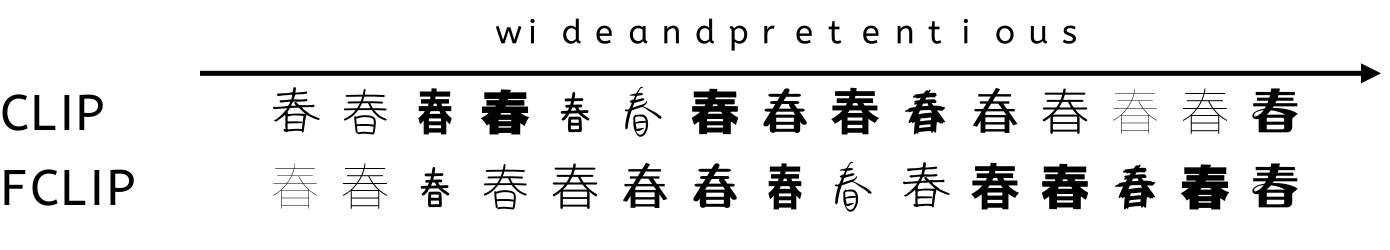

In [73]:
font_dir = "../gwfonts"
char_size = 150
# tmp_font_paths = validation_font_paths[:50]
tmp_font_paths = selected_15_roman_font_paths
tmp_font_paths = selected_15_cjk_font_paths
if tmp_font_paths == selected_15_roman_font_paths:
    image_file_dir = gray_scale_image_file_dir
    target_character = "A"
    texts_for_font_image = [fox_text_four_lines]
    line_num = target_character.count("\n") + 1
    width = int(char_size * len(target_character) / line_num)
    height = int((char_size + 50) * line_num)
else:
    image_file_dir = None
    target_character = "春"
    texts_for_font_image = ["夏林\n火山"]
    line_num = target_character.count("\n") + 1
    width = int(char_size * len(target_character) / line_num)
    height = int((char_size + 50) * line_num)

model_type = "clip_and_fclip_roman"

# for target_attribute in ['italic, artistic']:
for target_attribute in ['wide, pretentious']:
# for target_attribute in ['artistic, italic']:
    # target_attribute = 'soft'
    try:
        tmp_target_attributes = [target_attribute]
        data = TestDataset(
            tmp_font_paths,
            None,
            texts_for_font_image,
            char_size=150,
            attribute_threshold=0,
            target_attributes=tmp_target_attributes,
            image_file_dir=image_file_dir,
            dump_image=True,
            preprocess=preprocess,
        )

        tmp_cos_sim = calculate_corr(clip_model, data, predict_mode=True)
        sorted_index = np.argsort(tmp_cos_sim)
        clip_cos_sim = sorted_index

        tmp_cos_sim = calculate_corr(fclip_model, data, predict_mode=True)
        sorted_index = np.argsort(tmp_cos_sim)
        fclip_cos_sim = sorted_index

        assert len(clip_cos_sim) == len(fclip_cos_sim)

        target_attribute = target_attribute.replace(",", "and").replace(" ", "")
        output_path = f"outputs/svg/{target_attribute}_{target_character}.svg"
        display(
            SVG(
                create_svg_from_font_two_lines(
                    tmp_font_paths,
                    clip_cos_sim,
                    fclip_cos_sim,
                    target_character,
                    target_attribute,
                    output_path=output_path,
                    char_size=50,
                )
            )
        )
    except Exception as e:
        print(e)
        raise(e)

In [18]:
target_attribute

'thin wide'

In [13]:
tmp_cos_sim

array([ 0.02318 ,  0.002777,  0.00982 ,  0.02509 , -0.003218,  0.02045 ,
        0.0253  ,  0.03085 ,  0.01826 ,  0.02725 ,  0.02841 ,  0.02165 ,
        0.017   ,  0.02422 ,  0.02548 ], dtype=float16)